# Premier League 2018/2019 Player Analyses
## A mathematical data analysis of this season's players
> Created By: [Pedro Varela](https://github.com/pedro-varela1)

<img src="https://th.bing.com/th/id/R.02f15048e63df3ad452fbd79e8d87667?rik=bTImMVExASU3qQ&pid=ImgRaw&r=0"
    style="width:100px; float: right; margin: 0 40px 40px 40px;"></img>
  
![divider](https://webstockreview.net/images/divider-clipart-design-line-5.png)

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [71]:
players = pd.read_csv(
    'england-premier-league-players-2018-to-2019-stats.csv'
)

In [72]:
players.head()

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,32,629712000,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,...,1.25,72,79,1589,1589,0.06,290,191,80,20
1,Aaron Lennon,35,545554800,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,1.48,61,76,1217,1217,0.07,196,187,-1,10
2,Aaron Mooy,32,653382000,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,1.78,51,80,582,2327,0.15,144,233,-1,3
3,Aaron Ramsey,31,662198400,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,0.81,111,47,0,221,0.00,69,8,-1,5
4,Aaron Rowe,22,968310000,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,...,1.30,69,35,0,0,0.00,-1,-1,-1,31


![divider](https://webstockreview.net/images/divider-clipart-design-line-5.png)

### Now that we've loaded our data, let's look at the age of the players for that season:

In [73]:
players['age'].mean()

29.742105263157896

In [74]:
players['age'].median()

30.0

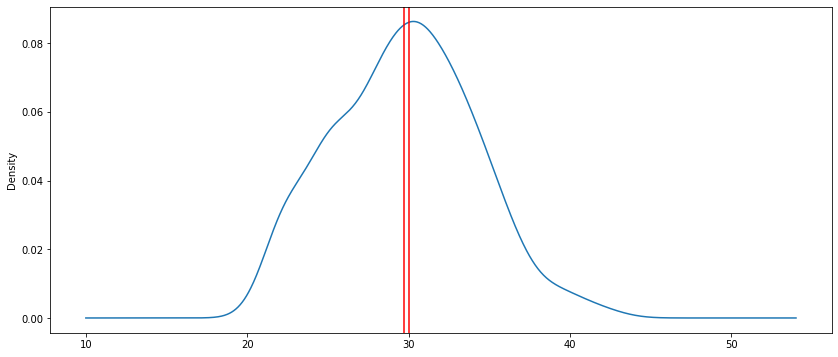

In [75]:
ax = players['age'].plot(kind='kde', figsize=(14,6))
ax.axvline(players['age'].mean(), color='red')
ax.axvline(players['age'].median(), color='red')

In [76]:
players['age'].max()

43

In [77]:
players.loc[players['age'] == players['age'].max(), 'full_name']

305    Julián Speroni
Name: full_name, dtype: object

In [78]:
players['age'].min()

21

In [79]:
players.loc[players['age'] == players['age'].min(), 'full_name']

91     Callum Hudson-Odoi
125          Curtis Jones
241          James Garner
378       Mason Greenwood
392            Matty Daly
Name: full_name, dtype: object

<AxesSubplot:ylabel='category_age'>

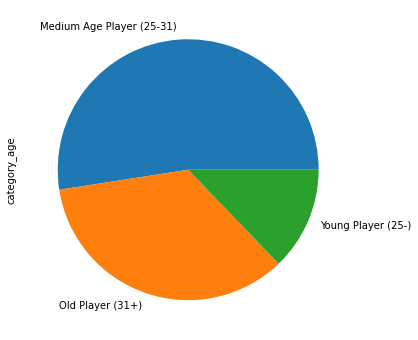

In [80]:
players['category_age'] = ''
players.loc[players['age'] >= 32, 'category_age'] += 'Old Player (31+)'
players.loc[(players['age'] >= 25) & (players['age'] < 32), 'category_age'] += 'Medium Age Player (25-31)'
players.loc[players['age'] < 25, 'category_age'] += 'Young Player (25-)'

players['category_age'].value_counts().plot(kind='pie', figsize=(6,6))

With this, it was possible to carry out a complete analysis of the parameters related to the age of the players: <b>maximum</b>, <b>minimum</b>, <b>average</b>, <b>median</b>. In addition to an age <b>density graph</b> and a <b>pie graph</b> categorizing the age of the players through the creation of a new column.


![divider](https://webstockreview.net/images/divider-clipart-design-line-5.png)

### Let's analyze the relationship between the columns:

In [81]:
corr = players.corr()
corr

,age,birthday,minutes_played_overall,minutes_played_home,minutes_played_away,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
age,1.000000,-0.997835,0.206642,0.192910,0.216697,0.193218,0.185662,0.196253,0.061077,0.063371,...,0.132222,0.175508,0.311540,0.132357,0.107196,0.124480,0.187481,0.194103,0.154019,0.158791
birthday,-0.997835,1.000000,-0.207790,-0.194013,-0.217868,-0.195300,-0.187808,-0.198222,-0.061753,-0.063324,...,-0.136666,-0.174960,-0.312623,-0.133068,-0.107928,-0.125009,-0.190709,-0.198963,-0.157380,-0.161642
minutes_played_overall,0.206642,-0.207790,1.000000,0.990805,0.990522,0.948488,0.935010,0.939650,0.445361,0.405509,...,0.108532,0.395272,0.779020,0.573445,0.500795,0.090069,0.439023,0.428136,0.276814,-0.023843
minutes_played_home,0.192910,-0.194013,0.990805,1.000000,0.962830,0.939822,0.941601,0.915850,0.450017,0.417522,...,0.102108,0.386472,0.768303,0.569835,0.503887,0.092252,0.429587,0.417792,0.269952,-0.031057
minutes_played_away,0.216697,-0.217868,0.990522,0.962830,1.000000,0.939442,0.910728,0.946133,0.432256,0.385685,...,0.113012,0.396769,0.775244,0.566321,0.488236,0.086158,0.440344,0.430583,0.278572,-0.016071
appearances_overall,0.193218,-0.195300,0.948488,0.939822,0.939442,1.000000,0.988291,0.988167,0.489537,0.442655,...,0.139724,0.470559,0.709545,0.567195,0.496133,0.115654,0.411295,0.416917,0.183716,-0.030764
appearances_home,0.185662,-0.187808,0.935010,0.941601,0.910728,0.988291,1.000000,0.953193,0.482042,0.443318,...,0.130216,0.461086,0.694441,0.560089,0.498974,0.116588,0.404224,0.409966,0.179622,-0.028859
appearances_away,0.196253,-0.198222,0.939650,0.915850,0.946133,0.988167,0.953193,1.000000,0.485517,0.431540,...,0.145984,0.468975,0.707981,0.560951,0.481566,0.111985,0.408695,0.414064,0.183495,-0.031953
goals_overall,0.061077,-0.061753,0.445361,0.450017,0.432256,0.489537,0.482042,0.485517,1.000000,0.942748,...,-0.006724,0.263535,0.269871,0.256823,0.192076,0.013559,-0.299830,-0.046731,-0.179433,-0.447999
goals_home,0.063371,-0.063324,0.405509,0.417522,0.385685,0.442655,0.443318,0.431540,0.942748,1.000000,...,-0.014360,0.256739,0.243896,0.249171,0.187723,0.005189,-0.277335,-0.042104,-0.166944,-0.405752


([<matplotlib.axis.YTick at 0x7f7c723e6100>,
 [Text(0, 0, 'age'),
  Text(0, 1, 'birthday'),
  Text(0, 2, 'minutes_played_overall'),
  Text(0, 3, 'minutes_played_home'),
  Text(0, 4, 'minutes_played_away'),
  Text(0, 5, 'appearances_overall'),
  Text(0, 6, 'appearances_home'),
  Text(0, 7, 'appearances_away'),
  Text(0, 8, 'goals_overall'),
  Text(0, 9, 'goals_home'),
  Text(0, 10, 'goals_away'),
  Text(0, 11, 'assists_overall'),
  Text(0, 12, 'assists_home'),
  Text(0, 13, 'assists_away'),
  Text(0, 14, 'penalty_goals'),
  Text(0, 15, 'penalty_misses'),
  Text(0, 16, 'clean_sheets_overall'),
  Text(0, 17, 'clean_sheets_home'),
  Text(0, 18, 'clean_sheets_away'),
  Text(0, 19, 'conceded_overall'),
  Text(0, 20, 'conceded_home'),
  Text(0, 21, 'conceded_away'),
  Text(0, 22, 'yellow_cards_overall'),
  Text(0, 23, 'red_cards_overall'),
  Text(0, 24, 'goals_involved_per_90_overall'),
  Text(0, 25, 'assists_per_90_overall'),
  Text(0, 26, 'goals_per_90_overall'),
  Text(0, 27, 'goals_per_90

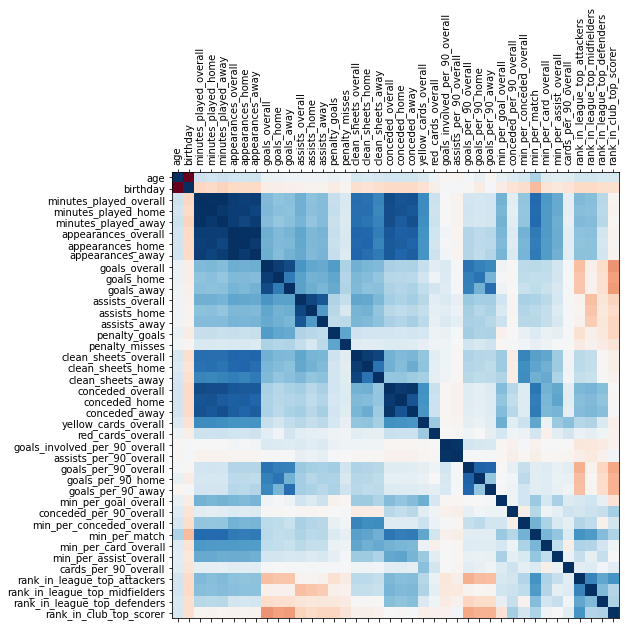

In [82]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns)

<AxesSubplot:xlabel='minutes_played_overall', ylabel='goals_overall'>

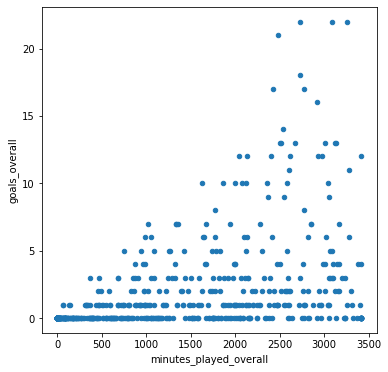

In [83]:
players.plot(kind='scatter', x='minutes_played_overall', y='goals_overall', figsize=(6,6))

<AxesSubplot:xlabel='goals_overall', ylabel='rank_in_league_top_attackers'>

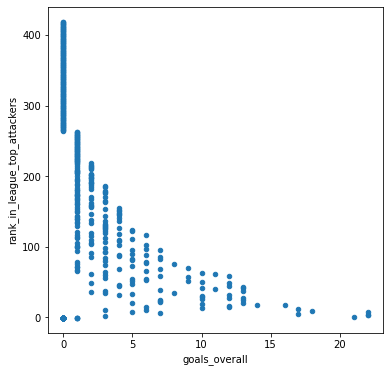

In [84]:
players.plot(kind='scatter', x='goals_overall', y='rank_in_league_top_attackers', figsize=(6,6))

We related some variables from the database, creating a figure that graphically shows the correlation between the variables. Furthermore, with the creation of graphs with points, we realized that there is no direct linear relationship between the minutes played by the player and his total goals, as there are many defenders who play many games and do not score goals; and also, an inverse linear relationship between the number of goals and the player's position in the ranking of the best strikers was noticed, since the more goals he scores, the closer he is to the top positions.

![divider](https://webstockreview.net/images/divider-clipart-design-line-5.png)

### Finally, let's look at the names of the big six players:

In [85]:
# Arsenal players
players.loc[players['Current Club'] == 'Arsenal', 'full_name']

3                   Aaron Ramsey
19        Ainsley Maitland-Niles
22                    Alex Iwobi
28           Alexandre Lacazette
84                    Bernd Leno
98                Carl Jenkinson
128     Damián Emiliano Martínez
141                Danny Welbeck
159                 Denis Suárez
169               Edward Nketiah
173             Emile Smith Rowe
210                 Granit Xhaka
220              Hector Bellerin
222           Henrikh Mkhitaryan
297               Joseph Willock
325      Konstantinos Mavropanos
332            Laurent Koscielny
351               Lucas Torreira
389        Mattéo Guendouzi Olié
398                   Mesut Özil
407               Mohamed Elneny
416                Nacho Monreal
446                    Petr Čech
453    Pierre-Emerick Aubameyang
465                  Rob Holding
496               Sead Kolašinac
508             Shkodran Mustafi
511    Sokratis Papastathopoulos
516         Stephan Lichtsteiner
567             Zechariah Medley
Name: full

In [86]:
# Chelsea players
players.loc[players['Current Club'] == 'Chelsea', 'full_name']

37                   Alvaro Morata
43             Andreas Christensen
57                 Antonio Rüdiger
91              Callum Hudson-Odoi
102              Cesar Azpilicueta
103                  Cesc Fabregas
136               Danny Drinkwater
147                     David Luiz
149              Davide Zappacosta
167                    Eden Hazard
172    Emerson Palmieri dos Santos
178                   Ethan Ampadu
201                    Gary Cahill
208                Gonzalo Higuain
292                       Jorginho
319              Kepa Arrizabalaga
363                     Marc Guehi
366                  Marcos Alonso
381                  Mateo Kovačić
414                   N'Golo Kanté
432                 Olivier Giroud
444                Pedro Rodriguez
474                   Ross Barkley
477             Ruben Loftus-Cheek
545                   Victor Moses
555      Wilfredo Daniel Caballero
559                        Willian
Name: full_name, dtype: object

In [87]:
# Liverpool players
players.loc[players['Current Club'] == 'Liverpool', 'full_name']

10                 Adam David Lallana
20                     Alberto Moreno
24            Alex Oxlade-Chamberlain
36                     Alisson Becker
45                   Andrew Robertson
125                      Curtis Jones
132                  Daniel Sturridge
154                      Dejan Lovren
162                      Divock Origi
183                           Fabinho
205               Georginio Wijnaldum
245                      James Milner
270                         Joe Gomez
275                        Joel Matip
289                  Jordan Henderson
346                      Loris Karius
409                     Mohamed Salah
415                   Naby Deco Keïta
456    Rafael Euclides Soares Camacho
469                   Roberto Firmino
487                        Sadio Mané
510                    Simon Mignolet
537            Trent Alexander-Arnold
551                   Virgil van Dijk
561                   Xherdan Shaqiri
Name: full_name, dtype: object

In [88]:
# Manchester City players
players.loc[players['Current Club'] == 'Manchester City', 'full_name']

59                 Arijanet Muric
67                Aymeric Laporte
79                 Benjamin Mendy
83                 Bernardo Silva
119    Claudio Andrés Bravo Muñoz
135                        Danilo
148                   David Silva
168                       Ederson
181                  Fabian Delph
189            Fernando Luiz Rosa
199                 Gabriel Jesus
228                İlkay Gündoğan
279                   John Stones
320               Kevin De Bruyne
329                   Kyle Walker
341                    Leroy Sané
427              Nicolas Otamendi
430           Oleksandr Zinchenko
451                  Philip Foden
452              Philippe Sandler
457               Raheem Sterling
464                  Riyad Mahrez
502                 Sergio Aguero
550               Vincent Kompany
Name: full_name, dtype: object

In [89]:
# Manchester United players
players.loc[players['Current Club'] == 'Manchester United', 'full_name']

30                   Alexis Sanchez
38                    Ander Herrera
44                  Andreas Pereira
50                      Angel Gomes
55                  Anthony Martial
58                 Antonio Valencia
65                     Ashley Young
110                  Chris Smalling
145                    David de Gea
174            Eric Bertrand Bailly
185    Faustino Marcos Alberto Rojo
198      Frederico Rodrigues Santos
241                    James Garner
265                   Jesse Lingard
293       José Diogo Dalot Teixeira
304                       Juan Mata
336                       Lee Grant
356                       Luke Shaw
368                 Marcus Rashford
374               Marouane Fellaini
378                 Mason Greenwood
388                  Matteo Darmian
426                   Nemanja Matić
441                      Paul Pogba
449                      Phil Jones
472                   Romelu Lukaku
495                 Scott McTominay
503            Sergio Germán

In [90]:
# Tottenham Hotspur players
players.loc[players['Current Club'] == 'Tottenham Hotspur', 'full_name']

33                     Alfie Whiteman
71                         Ben Davies
114                 Christian Eriksen
137                        Danny Rose
150             Davinson Sánchez Mina
155                         Dele Alli
175                         Eric Dier
177                       Erik Lamela
188          Fernando Llorente Torres
203                      George Marsh
204      Georges-Kevin N'Koudou Mbida
215                        Harry Kane
217                       Harry Winks
223                     Heung-Min Son
225                       Hugo Lloris
252                    Jan Vertonghen
303                 Juan Marcos Foyth
314                  Kazaiah Sterling
324                   Kieran Trippier
330                Kyle Walker-Peters
350    Lucas Rodrigues Moura da Silva
354                         Luke Amos
402                       Michel Vorm
412                    Moussa Dembele
413                    Moussa Sissoko
431                      Oliver Skipp
442         

![divider](https://webstockreview.net/images/divider-clipart-design-line-5.png)